# Notebook_04: Exploratory Analysis

Now that I've fit the frequency and amplitude based curves and confirmed at least the frequency curve matches the publication in shape. The objective of this notebook is to explore the data a bit further and potentially experiment with modelling options.

## Imports & Setup

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import seaborn as sns
sns.set_style('whitegrid')
import chartify
%matplotlib inline

ModuleNotFoundError: No module named 'chartify'

In [ ]:
chartify.color_palettes.show()

In [ ]:
mpl.rcParams["figure.figsize"] = [10, 6]
mpl.rcParams["figure.dpi"] = 200
mpl.rcParams["axes.titlesize"] = 10
mpl.rcParams["axes.labelsize"] = 8

In [ ]:
project_root = Path().resolve().parent
data_path = project_root / 'Data' / 'Interim' / 'full_with_poly_preds.csv'

In [ ]:
# Suppressing scientific notiation for clarity, not dealing with any large or small numbers here so it's fine to do this
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## EDA

In [ ]:
df = pd.read_csv(data_path)

In [ ]:
df['CD/t_pred_freq'] = df['tc_pred_freq'].apply(lambda x: x / 3)
df['CD/t_pred_amp'] = df['tc_pred_amp'].apply(lambda x: x / 3)

In [ ]:
df.sample(20)

In [ ]:
df.describe()

In [ ]:
df.corrwith(df['tc_act']).sort_values(ascending = False)

In [ ]:
ch = chartify.Chart(blank_labels = True)
ch.style.set_color_palette(palette_type = 'sequential', palette = 'Reds')
ch.plot.scatter(df, 'nf_drop', 'tc_act', color_column = 'temp')
ch.set_title('Crack Depth Data')
ch.set_subtitle('Frequency Drop')
ch.axes.set_yaxis_label('Measured Crack Depth (mm)')
ch.axes.set_xaxis_label('Drop in Natural Frequency (Hz)')
ch.axes.set_yaxis_tick_format("0.0")
ch.set_legend_location('top_left')
ch.figure.legend.title = 'Temperature (Celsius)'
ch.show()

In [ ]:
ch = chartify.Chart(blank_labels = True)
ch.style.set_color_palette(palette_type = 'sequential', palette = 'Reds')
ch.plot.scatter(df, 'amp_drop', 'tc_act', color_column = 'temp')
ch.set_title('Crack Depth Data')
ch.set_subtitle('Amplitude Drop')
ch.axes.set_yaxis_label('Measured Crack Depth (mm)')
ch.axes.set_xaxis_label('Amplitude Drop (mm)')
ch.axes.set_yaxis_tick_format("0.0")
ch.set_legend_location('top_right')
ch.figure.legend.title = 'Temperature (Celsius)'
ch.show()

In [ ]:
ch = chartify.Chart(blank_labels = True)
ch.style.set_color_palette(palette_type = 'sequential', palette = 'Reds')
ch.plot.scatter(df, 'tc_act', 'tc_pred_freq', color_column = 'temp')
ch.set_title('Predicted Crack Length vs Actual')
ch.set_subtitle('Predictions Based on Polynomial Curve: Natural Frequency')
ch.axes.set_yaxis_label('Frequency Predicted Crack Depth (mm)')
ch.axes.set_xaxis_label('Measured Crack Depth (mm)')
ch.axes.set_yaxis_tick_format("0.0")
ch.axes.set_xaxis_tick_format("0.0")
ch.axes.set_yaxis_range(0, 3)
# ch.set_legend_location('bottom_left')
ch.figure.legend.title = 'Temperature (Celsius)'
ch.show()

In [ ]:
ch = chartify.Chart(blank_labels = True)
ch.style.set_color_palette(palette_type = 'sequential', palette = 'Reds')
ch.plot.scatter(df, 'tc_act', 'tc_pred_amp', color_column = 'temp')
ch.set_title('Predicted Crack Length vs Actual')
ch.set_subtitle('Predictions Based on Polynomial Curve: Amplitude')
ch.axes.set_yaxis_label('Amplitude Predicted Crack Depth (mm)')
ch.axes.set_xaxis_label('Measured Crack Length (mm)')
ch.axes.set_yaxis_tick_format("0.0")
ch.axes.set_xaxis_tick_format("0.0")
# ch.axes.set_yaxis_range(0, 3)
# ch.set_legend_location('bottom_left')
ch.figure.legend.title = 'Temperature (Celsius)'
ch.show()

In [ ]:
df.loc[df['x'] == 15].sample(5)

In [ ]:
df.loc[df['x'] == 15].describe()

In [ ]:
fig = plt.figure()
ax = fig.gca(projection = '3d')

X = df['temp']
Y = df['nf_drop']
Z = df['tc_pred_freq']

surf = ax.plot_trisurf(X, Y, Z, cmap = cm.coolwarm, linewidth = 0, 
                      antialiased = True)
ax.set_zlim(0.00, 3.00, auto = True)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.set_xlim(200, 0)
ax.set_ylim(0, 20)

plt.xlabel('Temperature ($^\circ$C)')
plt.ylabel('Frequency Drop (Hz)')
ax.set_zlabel('Predicted Crack Depth (mm)')

plt.title('Replicate Polynomial Model, Frequency Drop, All Crack Positions')

fig.colorbar(surf, shrink = 0.5, aspect = 5, label = 'Predicted Crack Depth (mm)')


plt.tight_layout()

# plt.savefig(fname = Path('../Figures/freq_curve.png'), dpi = 300)

In [ ]:
fig = plt.figure()
ax = fig.gca(projection = '3d')

X = df['temp']
Y = df['nf_drop']
Z = df['tc_act']

surf = ax.plot_trisurf(X, Y, Z, cmap = cm.coolwarm, linewidth = 0, 
                      antialiased = True)
ax.set_zlim(0.00, 3.00, auto = True)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.set_xlim(200, 0)
ax.set_ylim(0, 20)

plt.xlabel('Temperature ($^\circ$C)')
plt.ylabel('Frequency Drop (Hz)')
ax.set_zlabel('Actual Crack Depth (mm)')

plt.title('Actual Measured Data, Frequency Drop, All Crack Positions')

fig.colorbar(surf, shrink = 0.5, aspect = 5, label = 'Actual Crack Depth (mm)')


plt.tight_layout()

# plt.savefig(fname = Path('../Figures/freq_curve.png'), dpi = 300)

In [ ]:
fig = plt.figure()
ax = fig.gca(projection = '3d')

X = df['temp']
Y = df['amp_drop']
Z = df['tc_pred_amp']

surf = ax.plot_trisurf(X, Y, Z, cmap = cm.coolwarm, linewidth = 0, 
                      antialiased = True)
ax.set_zlim(0.00, 3.00, auto = True)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.set_xlim(200, 0)
ax.set_ylim(-8, 2)

plt.xlabel('Temperature ($^\circ$C)')
plt.ylabel('Amplitude Drop (mm)')
ax.set_zlabel('Predicted Crack Depth (mm)')

plt.title('Replicate Polynomial Model, Amplitude Drop, All Crack Positions')

fig.colorbar(surf, shrink = 0.5, aspect = 5, label = 'Predicted Crack Depth (mm)')


plt.tight_layout()

# plt.savefig(fname = Path('../Figures/freq_curve.png'), dpi = 300)

In [ ]:
fig = plt.figure()
ax = fig.gca(projection = '3d')

X = df['temp']
Y = df['amp_drop']
Z = df['tc_act']

surf = ax.plot_trisurf(X, Y, Z, cmap = cm.coolwarm, linewidth = 0, 
                      antialiased = True)
ax.set_zlim(0.00, 3.00, auto = True)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.set_xlim(200, 0)
ax.set_ylim(-8, 2)

plt.xlabel('Temperature ($^\circ$C)')
plt.ylabel('Amplitude Drop (mm)')
ax.set_zlabel('Actual Crack Depth (mm)')

plt.title('Actual Measured Data, Amplitude Drop, All Crack Positions')

fig.colorbar(surf, shrink = 0.5, aspect = 5, label = 'Actual Crack Depth (mm)')


plt.tight_layout()

# plt.savefig(fname = Path('../Figures/freq_curve.png'), dpi = 300)

In [ ]:
# Plot x = CD/t, y = Amplitude diff

ch = chartify.Chart(blank_labels = True)
ch.style.set_color_palette(palette_type = 'sequential', palette = 'reds')
ch.set_title('Amplitude vs Crack Depth')
ch.set_subtitle('Recreate Fig 13b from Paper, 5mm crack position only')
ch.axes.set_yaxis_label('Amplitude Drop (mm)')
ch.axes.set_xaxis_label('Crack Depth/thickness')

ch.plot.line(data_frame = df.loc[df['x'] == 5], x_column = 'CD/t', y_column = 'amp_drop', color_column = 'temp', line_width = 2)

ch.set_legend_location('top_right')
ch.figure.legend.title = 'Temperature (Celsius)'


ch.show()

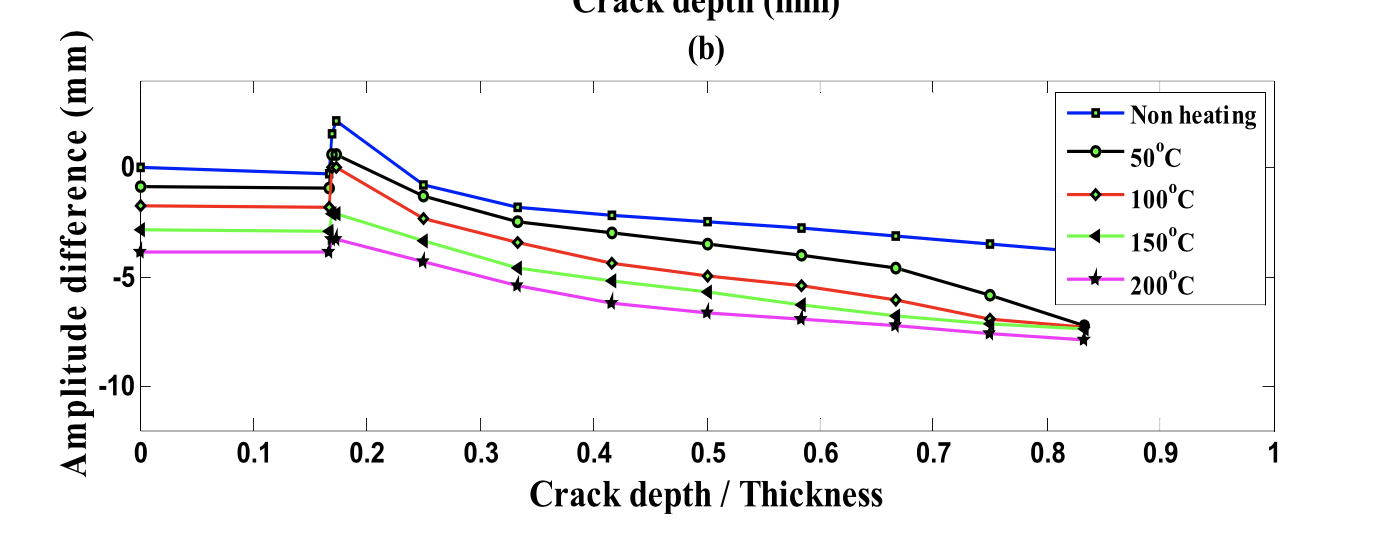

### Recreate Fig22

Fig 22 shows the amplitude difference predictions vs measurements for 200C and 15% of specimen length (25mm)

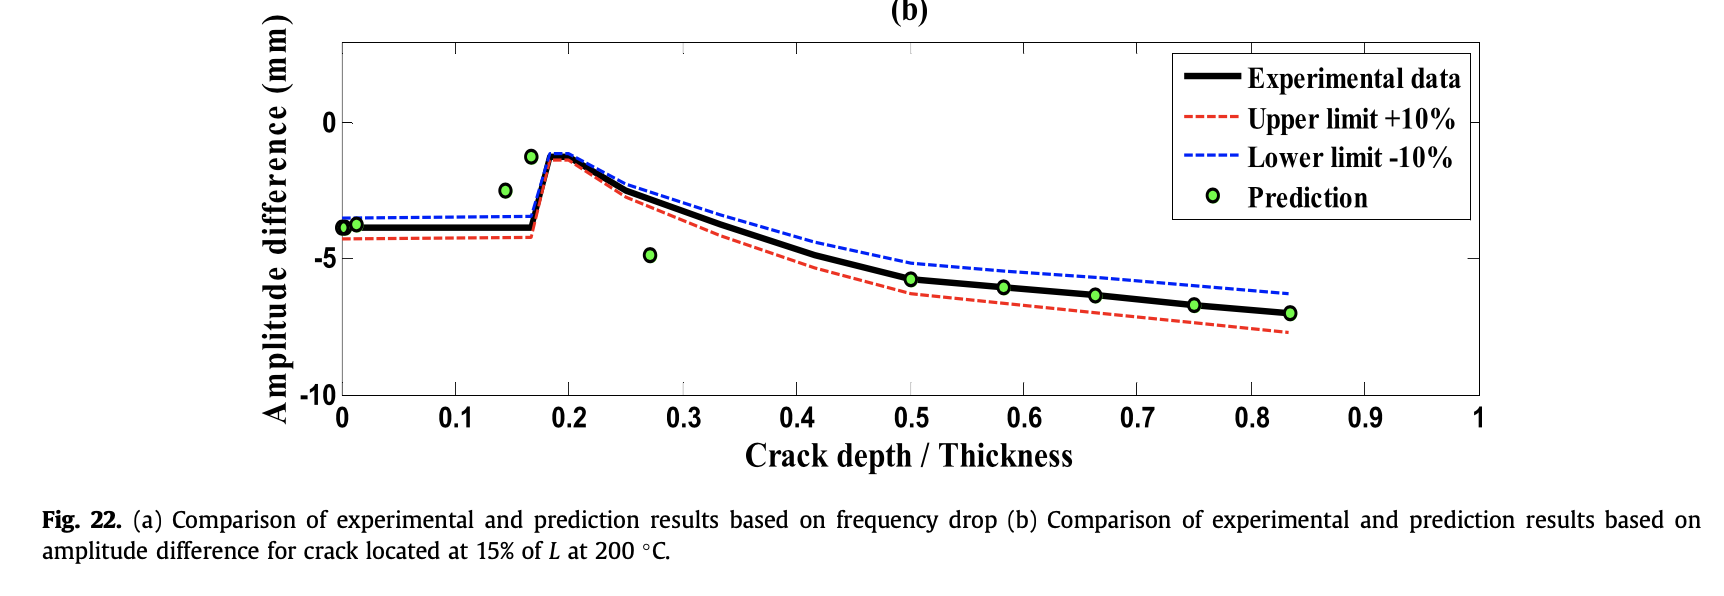

In [ ]:
# Try and recreate fig22

ch = chartify.Chart(blank_labels = True)
ch.style.set_color_palette(palette_type = 'sequential', palette = 'reds')
ch.set_title('Amplitude vs Crack Depth/thickness')
ch.set_subtitle('Recreate Fig 22 from Paper, 15mm crack position only, 200C')
ch.axes.set_yaxis_label('Amplitude Drop (mm)')
ch.axes.set_xaxis_label('Crack Depth/thickness')
# ch.axes.set_yaxis_range(-10, 0)

ch.plot.line(data_frame = df.loc[(df['x'] == 15) & (df['temp'] == 200)], x_column = 'CD/t', y_column = 'amp_drop', color_column = 'temp', line_width = 2)
ch.plot.scatter(data_frame = df.loc[(df['x'] == 15) & (df['temp'] == 200)], x_column = 'CD/t_pred_amp', y_column = 'amp_drop', color_column = 'temp')

ch.set_legend_location('top_right')
ch.figure.legend.title = 'Temperature (Celsius)'


ch.show()

Okay so clearly something fishy is happening. I've double and triple checked my data and performed the calculations manually to verify my tc_pred generated by following the given polynomial equation with the provided coefficients and everything matches what I show above. I'm more than a little suspicious about the graph they present showing accurate predictions for 15mm crack position.

In [ ]:
# Plotting Amplitude vs Frequency
ch = chartify.Chart(blank_labels = True)
ch.style.set_color_palette(palette_type = 'sequential', palette = 'reds')
ch.set_title('Structural Response')
ch.set_subtitle('Amplitude vs Natural Frequency')
ch.axes.set_yaxis_label('Amplitude (mm)')
ch.axes.set_xaxis_label('Natural Frequency (Hz)')

ch.plot.scatter(data_frame = df, x_column = 'nf_hz', y_column = 'amp_mm', color_column = 'temp')

ch.set_legend_location('top_right')
ch.figure.legend.title = 'Temperature (Celsius)'

ch.show()